In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3,
random_state=5)
print(len(X_train))
print(len(X_test))
X_train

105
45


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,6.2,2.8,4.8,1.8
61,5.9,3.0,4.2,1.5
124,6.7,3.3,5.7,2.1
117,7.7,3.8,6.7,2.2
20,5.4,3.4,1.7,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

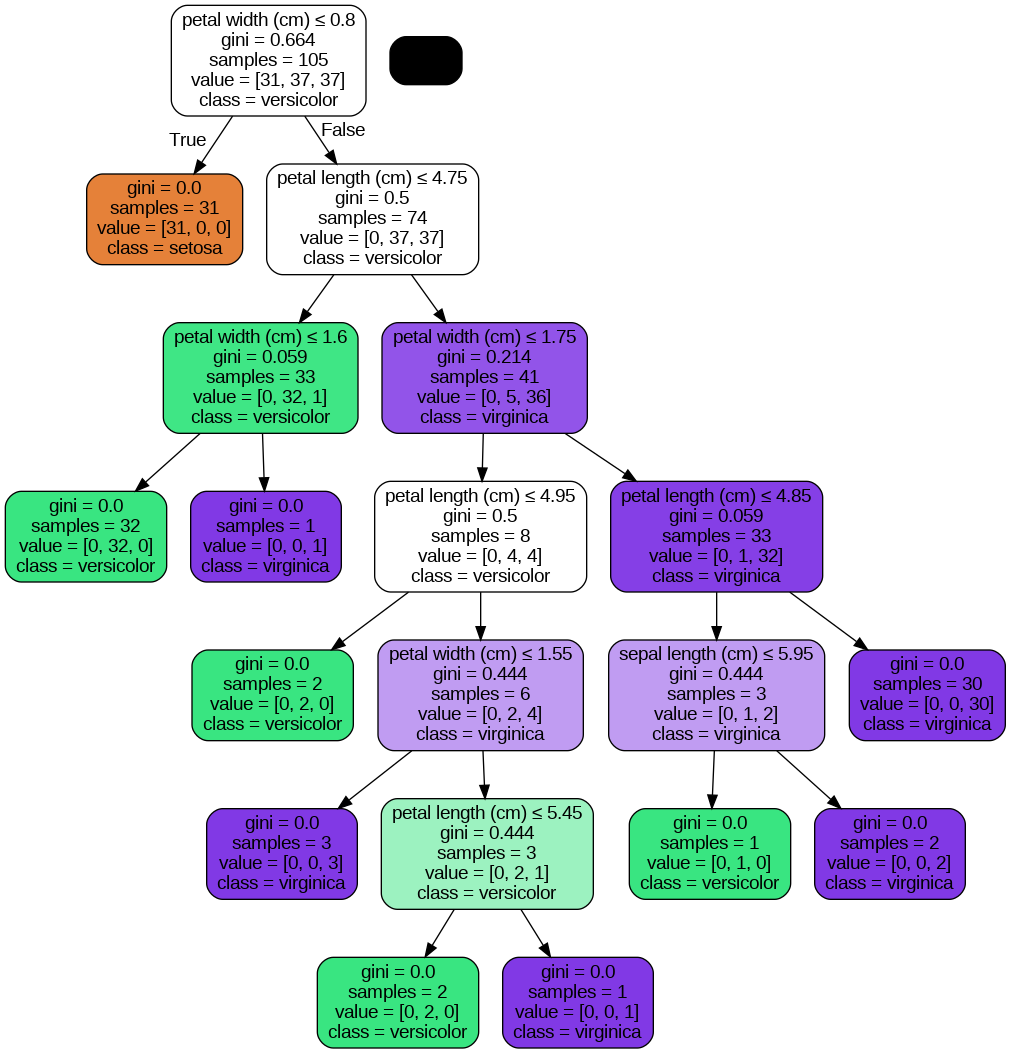

In [ ]:
# Install required libraries
!pip install IPython scikit-learn pydotplus six

# Import necessary libraries
from six import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pydotplus

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Export the decision tree to DOT format
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=data.feature_names, class_names=data.target_names,
                filled=True, rounded=True, special_characters=True)

# Generate a graph and display it as an image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
model.predict([[0,1,0,0]])

array([0])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])